# 1. Read the images and make modifications

### Uncomment this if you will use it in Colab

In [1]:
# import importlib.util
# import sys
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd gdrive/My\ Drive/Colab\ Notebooks/102_flower-types_dataset/
# % ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/102_flower-types_dataset


### make directories for training, validation and test images

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
import cv2
import scipy
import random
import scipy.misc
import matplotlib.pyplot as plt
if (not os.path.exists('train')):
    os.mkdir('train')
if (not os.path.exists('valid')):
    os.mkdir('valid')
if (not os.path.exists('test')):
    os.mkdir('test')

### Read datasets and load only 17 classes for training, validation and test

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009', '__version__': '1.0', '__globals__': [], 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}
(8189,)
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009', '__version__': '1.0', '__globals__': [], 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16), 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16), 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}

6149 examples in original training set
1020 examples in original validation set
1020 examples in original test set


D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.



 Loaded 6149 images from original training set

Sanity check of training set

jpg/image_07220.jpg
ClassID=7


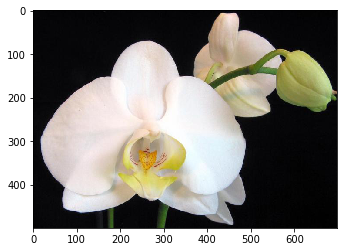


jpg/image_06370.jpg
ClassID=15


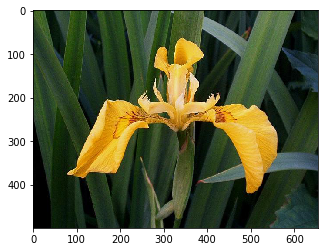


jpg/image_04038.jpg
ClassID=12


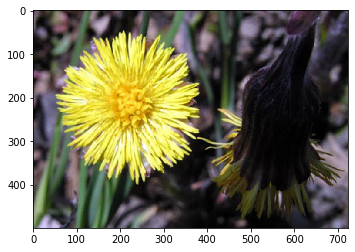

D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:94: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:95: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.



 Loaded 1020 images from original validation set

Sanity check of validation set

jpg/image_05120.jpg
ClassID=2


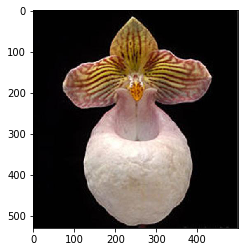


jpg/image_07212.jpg
ClassID=7


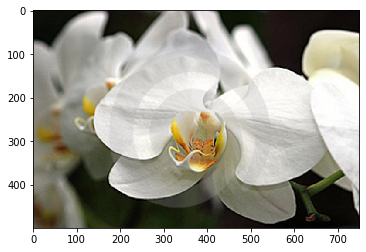


jpg/image_07173.jpg
ClassID=6


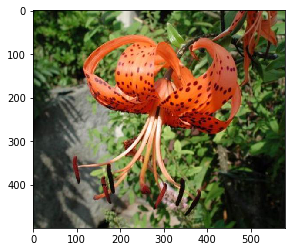

D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:137: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.



 Loaded 1020 images from original test set

Sanity check of test set

jpg/image_03114.jpg
ClassID=11


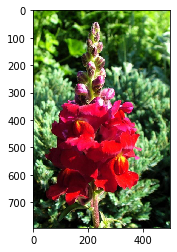


jpg/image_05755.jpg
ClassID=13


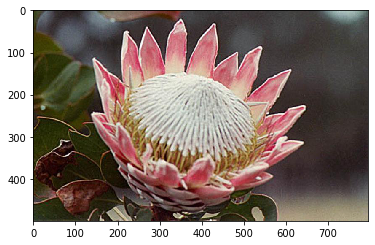


jpg/image_04059.jpg
ClassID=12


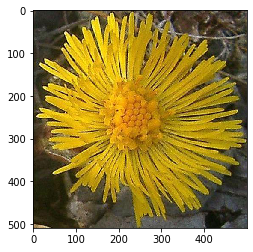

In [27]:
# LOAD INFORMATION FILES
import numpy as np 
import numpy
import scipy.io
import os

# First, load labels
img_labels_mat = scipy.io.loadmat('imagelabels.mat')
print(img_labels_mat)
img_labels = img_labels_mat.get('labels')
print(img_labels[0].shape)
targets = img_labels[0]

# Then load IDs of train/valid/test files
train_test_split = scipy.io.loadmat('setid.mat')
print(train_test_split)
print()
trainIDs = train_test_split.get('tstid')[0]
print(str(trainIDs.size)+" examples in original training set")
#print("IDs of the "+str(trainIDs.size)+" training images: "+str(trainIDs))
validIDs = train_test_split.get('valid')[0]
print(str(validIDs.size)+" examples in original validation set")
#print("IDs of the "+str(validIDs.size)+" validation images: "+str(validIDs))
testIDs = train_test_split.get('trnid')[0]
print(str(testIDs.size)+" examples in original test set")
#print("IDs of the "+str(testIDs.size)+" test images: "+str(testIDs))

# LOAD IMAGES 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import scipy.misc

# Load examples from original training set
imgNames_train = []
images_train = []
labels_train = []
for i in range(0,trainIDs.size):
    id = trainIDs[i]
    if (targets[id-1]<=17):
        filename = "jpg/image_"+format(id, '05d')+".jpg"
        imgNames_train.append(filename)
        images=plt.imread(filename)
        images_train.append(images)
        labels_train.append(targets[id-1])
    
####################################### ranger les donnees dans train directory      ################################
####################################### dans chacune, ranger les photos par classe (entre 1 et 102) #################
####################################### resize photos for memory and reduce time calculation ################

        if (not os.path.exists("./train/{}".format(targets[id-1]))):
            os.mkdir("./train/{}".format(targets[id-1]))
        images=scipy.misc.imresize(images, (224,224,3))
        scipy.misc.imsave("train/{}/image_".format(targets[id-1])+format(id, '05d')+".jpg", numpy.array(images))

######################################################################################################################
######################################################################################################################

print("\n Loaded "+str(trainIDs.size)+" images from original training set\n")
# Shuffle the training set (originally ordered by class after loading)
X_train_img, y_train, filenames_train = shuffle(images_train, labels_train, imgNames_train) # changing order for randomnisation
# Sanity check
print("Sanity check of training set\n")
for i in range(0,3):
    print(filenames_train[i])
    print("ClassID="+str(y_train[i]))
    plt.imshow(X_train_img[i])
    plt.show()
    print()
# for i in range(0,len(labels_train)):
#     if (not os.path.exists("./train/{}".format(labels_train[i]))):
#         os.mkdir("./train/{}".format(labels_train[i]))
#     images=scipy.misc.imresize(images_train[i], (224,224,3))
#     scipy.misc.imsave("train/{}/image_".format(labels_train[i])+format(trainIDs[i], '05d')+".jpg", numpy.array(images_train[i]))    
# Load examples from original validation set
imgNames_valid = []
images_valid = []
labels_valid = []
for i in range(0,validIDs.size):
    id = validIDs[i]
    if (targets[id-1]<=17):
        filename = "jpg/image_"+format(id, '05d')+".jpg"
        imgNames_valid.append(filename)
        images=plt.imread(filename)
        images_valid.append(images)
        labels_valid.append(targets[id-1])
    

####################################### ranger les donnees dans valid directory      ################################
####################################### dans chacune, ranger les photos par classe (entre 1 et 102) #################
####################################### resize photos for memory and reduce time calculation ################

        if (not os.path.exists("./valid/{}".format(targets[id-1]))):
            os.mkdir("./valid/{}".format(targets[id-1]))
        images=scipy.misc.imresize(images, (224,224,3))
        scipy.misc.imsave("valid/{}/image_".format(targets[id-1])+format(id, '05d')+".jpg", numpy.array(images))

######################################################################################################################
######################################################################################################################
    
print("\n Loaded "+str(validIDs.size)+" images from original validation set\n")
# Shuffle the training set (originally ordered by class after loading)
X_valid_img, y_valid, filenames_valid = shuffle(images_valid, labels_valid, imgNames_valid)
# Sanity check
# for i in range(0,len(y_valid)):
#     if (not os.path.exists("./valid/{}".format(y_train[i]))):
#         os.mkdir("./valid/{}".format(y_train[i]))
#     images=scipy.misc.imresize(X_train_img[i], (224,224,3))
#     scipy.misc.imsave("valid/{}/image_".format(y_valid[i])+format(validIDs[i], '05d')+".jpg", numpy.array(X_valid_img[i]))    

print("Sanity check of validation set\n")
for i in range(0,3):
    print(filenames_valid[i])
    print("ClassID="+str(y_valid[i]))
    plt.imshow(X_valid_img[i])
    plt.show()
    print()

# Load examples from original test set
imgNames_test = []
images_test = []
labels_test = []
for i in range(0,testIDs.size):
    id = testIDs[i]
    if (targets[id-1]<=17):
        filename = "jpg/image_"+format(id, '05d')+".jpg"
        imgNames_test.append(filename)
        images=plt.imread(filename)
        images_test.append(images)
        labels_test.append(targets[id-1])

####################################### ranger les donnees dans test directory      ################################
####################################### dans chacune, ranger les photos par classe (entre 1 et 102) ################
####################################### resize photos for memory and reduce time calculation ################
        if (not os.path.exists("./test/{}".format(targets[id-1]))):
            os.mkdir("./test/{}".format(targets[id-1]))
        images=scipy.misc.imresize(images, (224,224,3))
        scipy.misc.imsave("test/{}/image_".format(targets[id-1])+format(id, '05d')+".jpg", numpy.array(images))
    
######################################################################################################################
######################################################################################################################


print("\n Loaded "+str(testIDs.size)+" images from original test set\n")
# Shuffle the training set (originally ordered by class after loading)
X_test_img, y_test, filenames_test = shuffle(images_test, labels_test, imgNames_test)
# Sanity check
# for i in range(0,len(y_test.shape[0])):
#     if (not os.path.exists("./test/{}".format(y_test[i]))):
#         os.mkdir("./test/{}".format(y_test[i]))
#     images=scipy.misc.imresize(X_test_img[i], (224,224,3))
#     scipy.misc.imsave("test/{}/image_".format(y_test[i])+format(testIDs[i], '05d')+".jpg", numpy.array(X_test_img[i]))    

print("Sanity check of test set\n")
for i in range(0,3):
    print(filenames_test[i])
    print("ClassID="+str(y_test[i]))
    plt.imshow(X_test_img[i])
    plt.show()
    print()
    


### Test number of images 

In [28]:
print(len(labels_train))
print(len(labels_valid))
print(len(labels_test))

628
170
170


# 2. Data Augmentation

## Another method for reading images to prepare it for data augmentation

### Training dataset

In [29]:
#########################   Read image from original images  #####################
#########################   Read image from original images  #####################
#########################   Read image from original images  #####################
import matplotlib.pyplot as plt
import imageio
import cv2
### read existing images 
images_number=0
n_images=10000

training_set=[]
X_train=[]
image_number=[]
directory="train/"
for i in range (1,18,1):
    training_set=[]
    images_number=0
    image_names = [directory+str(i)+"/image_{:05d}.jpg".format(k) for k in range(n_images)] # le nom des images
    for img in image_names:
        try:
            # loaded_image = scipy.misc.imread(name=img)
            loaded_image = imageio.imread(img)
            training_set += [loaded_image]
            images_number = images_number + 1
        except:
            pass
    X=[]
    image_number.append(images_number)
    print(i,images_number)
    for z in range (images_number):
        X.append(training_set[z])
    X_train.append(np.array(X))
image_number_train=image_number


1 20
2 40
3 20
4 36
5 45
6 25
7 20
8 65
9 26
10 25
11 67
12 67
13 29
14 28
15 29
16 21
17 65


In [31]:
print(image_number_train)
print(sum(image_number_train))

[20, 40, 20, 36, 45, 25, 20, 65, 26, 25, 67, 67, 29, 28, 29, 21, 65]
628


### Valid dataset

In [35]:
#########################   Read image from original images  #####################
#########################   Read image from original images  #####################
#########################   Read image from original images  #####################

import cv2
### read existing images 
images_number=0
n_images=10000

validation_set=[]
X_valid=[]
image_number=[]
directory="./valid/"
for i in range (1,18,1):
    validation_set=[]
    images_number=0
    image_names = [directory+str(i)+"/image_{:05d}.jpg".format(k) for k in range(n_images)] # le nom des images
    for img in image_names:
        try:
            loaded_image = scipy.misc.imread(name=img)
            validation_set += [loaded_image]
            images_number = images_number + 1
        except:
            pass
    X=[]
    image_number.append(images_number)
    print(i,images_number)
    for z in range (images_number):
        X.append(validation_set[z])
    X_valid.append(np.array(X))
image_number_valid=image_number

D:\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 10
11 10
12 10
13 10
14 10
15 10
16 10
17 10


In [36]:
print(image_number_valid)
print(sum(image_number_valid))

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
170


### Data augmentation for training images

In [34]:
#########################   Data augmentation for training images #####################
####################  Generation ###################
####################  Generation ###################
####################  Generation ###################
from keras.preprocessing.image import ImageDataGenerator 
from  PIL import *
i=0
s=0
t=0
var=0
for images_number in image_number_train:
    t+=1
    print("Start Class",t)
    for i in range (images_number): 
        data = X_train[s][i]
        samples = np.expand_dims(data, 0)
        datagen = ImageDataGenerator(rotation_range=90)
        it = datagen.flow(samples, batch_size=1)
        for j in range(9):
            batch = it.next()
            image = batch[0].astype('uint8')
            img=Image.fromarray(image, 'RGB')
            img.save("./train/"+str(t)+"/image_{:05d}.jpg".format(var))
            var=var+1
        datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
        it = datagen.flow(samples, batch_size=1)
        for j in range(9):
            batch = it.next()
            image = batch[0].astype('uint8')
            img=Image.fromarray(image, 'RGB')
            img.save("./train/"+str(t)+"/image_{:05d}.jpg".format(var))
            var=var+1
        datagen = ImageDataGenerator(height_shift_range=0.25)
        it = datagen.flow(samples, batch_size=1)
        for j in range(9):
            batch = it.next()
            image = batch[0].astype('uint8')
            img=Image.fromarray(image, 'RGB')
            img.save("./train/"+str(t)+"/image_{:05d}.jpg".format(var))
            var=var+1
    s=s+1
    print("finish Class",t)


Start Class 1
finish Class 1
Start Class 2
finish Class 2
Start Class 3
finish Class 3
Start Class 4
finish Class 4
Start Class 5
finish Class 5
Start Class 6
finish Class 6
Start Class 7
finish Class 7
Start Class 8
finish Class 8
Start Class 9
finish Class 9
Start Class 10
finish Class 10
Start Class 11
finish Class 11
Start Class 12
finish Class 12
Start Class 13
finish Class 13
Start Class 14
finish Class 14
Start Class 15
finish Class 15
Start Class 16
finish Class 16
Start Class 17
finish Class 17


### Data augmentation for validation images

In [37]:
#########################   Data augmentation for validation images #####################
####################  Generation ###################
####################  Generation ###################
####################  Generation ###################
from keras.preprocessing.image import ImageDataGenerator 
from  PIL import *
i=0
s=0
t=0
var=0
for images_number in image_number_valid:
    t+=1
    print("Start Class",t)
    for i in range (images_number): 
        data = X_valid[s][i]
        samples = np.expand_dims(data, 0)
        datagen = ImageDataGenerator(rotation_range=90)
        it = datagen.flow(samples, batch_size=1)
        for j in range(9):
            batch = it.next()
            image = batch[0].astype('uint8')
            img=Image.fromarray(image, 'RGB')
            img.save("./valid/"+str(t)+"/image_{:05d}.jpg".format(var))
            var=var+1
        datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
        it = datagen.flow(samples, batch_size=1)
        for j in range(9):
            batch = it.next()
            image = batch[0].astype('uint8')
            img=Image.fromarray(image, 'RGB')
            img.save("./valid/"+str(t)+"/image_{:05d}.jpg".format(var))
            var=var+1
        datagen = ImageDataGenerator(height_shift_range=0.25)
        it = datagen.flow(samples, batch_size=1)
        for j in range(9):
            batch = it.next()
            image = batch[0].astype('uint8')
            img=Image.fromarray(image, 'RGB')
            img.save("./valid/"+str(t)+"/image_{:05d}.jpg".format(var))
            var=var+1
    s=s+1
    print("finish Class",t)
    if (s==20):
        break


Start Class 1
finish Class 1
Start Class 2
finish Class 2
Start Class 3
finish Class 3
Start Class 4
finish Class 4
Start Class 5
finish Class 5
Start Class 6
finish Class 6
Start Class 7
finish Class 7
Start Class 8
finish Class 8
Start Class 9
finish Class 9
Start Class 10
finish Class 10
Start Class 11
finish Class 11
Start Class 12
finish Class 12
Start Class 13
finish Class 13
Start Class 14
finish Class 14
Start Class 15
finish Class 15
Start Class 16
finish Class 16
Start Class 17
finish Class 17


# 3.Image Classification:
### Use 2 classes of flowers to compare GlobalAveragePooling and Flatten 

This example shows how to implement a transfer learning solution to solve image classification problems.

The goal is to build a model that identifies which type of flower is in the image. Accordingly, it is a binary classification problem of the 2 classes of flowers.

2 methods are used: Fully connected layers, global average pooling.

**Dataset**
* Inputs: Images of flowers.
* Outputs: Classification labels {1,2}.

**Error metric**
* Percentage of correctly labeled images (accuracy). 

**Evaluation protocol**
* Fully-connected layers: Hold-out validation. 
* Global average pooling: Hold-out validation.

**Performance goals**
* Accuracy > 0.90

**Solutions**
1. [Fully-connected layers]
1. [Global average pooling]

Extract features

We want to use a solution based on pre-trained models. We will use models that are composed of two parts:
* Convolutional base.
* Classifier.

Our approach will use the convolutional base to extract features, using them to train a classifier to classify the input image as a flower of class 1 or class 2. Therefore, the features extracted from the convolutional base will be the same for all classifiers studied here.

Now let's see how to extract features from a convolutional base.

In [42]:
# Instantiate convolutional base
from tensorflow.keras.applications import VGG16
img_width, img_height=224,224 # Default input size for VGG16
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))  # 3 = number of channels in RGB pictures

Line by line, what we are doing in VGG16 is:
* **weights** initializes model's weights. Here we are saying that we want to use the same weights as ImageNet
* **include_top** as false means that we want to train our own classifier on top of the convolutional base. The original VGG16 classifies images according to a set of 1 000 possible classes. Here we are just classifying our images as '1' or '2'. 
* **input_shape** defines the shape of the image tensors that will feed the network. We used the default input size of VGG16 (224x224), but we could have used a different shape.

We can now check the architecture of the convolutional base that we instantiated.

In [43]:
# Check architecture
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Ok, now that we have the convolutional base, we need to pass our images through it for feature extraction.

In [44]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [45]:
import os
base_dir = './only2classes'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
train_size, valid_size, test_size = 1680, 560, 20

img_width, img_height = 224, 224  # Default input size for VGG16
train_features, train_labels = extract_features(train_dir, train_size)  # Agree with our small dataset size
valid_features, valid_labels = extract_features(valid_dir, valid_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 1680 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Here we will see how to build a classifier based on fully-connected layers. This classifier will use the features extracted from the convolutional base.

## Define model

In [46]:

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

epochs = 20
model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.05))
model.add(layers.Dense(1, activation='sigmoid'))

    #     model = models.Sequential()
    #     
    #     model.add(layers.Dense(512, activation='relu'))
    #     # model.add(layers.Dropout(0.1))
    #     # model.add(layers.Dense(1024, activation='relu'))
    #     # model.add(layers.Dropout(0.3))
    #     model.add(layers.Dense(512, activation='relu'))
    #     model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 6,488,833
Trainable params: 6,488,833
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [48]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(valid_features, valid_labels))

Train on 1680 samples, validate on 560 samples
Epoch 1/20
1680/1680 [==============================] - 2s 1ms/sample - loss: 0.3134 - acc: 0.8982 - val_loss: 0.0172 - val_acc: 0.9946
Epoch 2/20
1680/1680 [==============================] - 1s 697us/sample - loss: 0.0041 - acc: 0.9994 - val_loss: 0.0156 - val_acc: 0.9929
Epoch 3/20
1680/1680 [==============================] - 1s 716us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0135 - val_acc: 0.9946
Epoch 4/20
1680/1680 [==============================] - 1s 697us/sample - loss: 3.6792e-04 - acc: 1.0000 - val_loss: 0.0103 - val_acc: 0.9946
Epoch 5/20
1680/1680 [==============================] - 1s 702us/sample - loss: 4.8365e-04 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 0.9946
Epoch 6/20
1680/1680 [==============================] - 1s 707us/sample - loss: 2.7524e-04 - acc: 1.0000 - val_loss: 0.0101 - val_acc: 0.9946
Epoch 7/20
1680/1680 [==============================] - 1s 688us/sample - loss: 1.3281e-04 - acc: 1.0000 - val_loss

### Save model

In [49]:

model.save('prediction_2classes_FC.h5')

## Model evaluation

## Learning curves

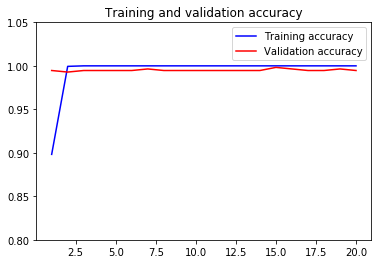

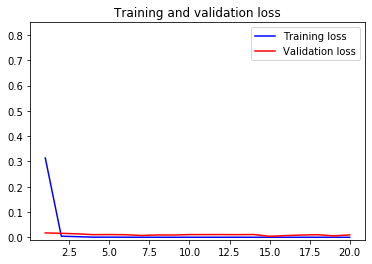

In [53]:
# Plot results
import matplotlib.pyplot as plt
axes = plt.gca()
axes.set_ylim([0.8,1.05])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
axes = plt.gca()
axes.set_ylim([-0.01,0.85])
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Define function to visualize predictions

In [68]:
test_1_dir = os.path.join(test_dir, '1')
test_2_dir = os.path.join(test_dir, '2')

def visualize_predictions(classifier, n_cases):
    for i in range(0,n_cases):
        path = random.choice([test_1_dir, test_2_dir])

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        print(img_path)
        img = plt.imread(img_path)
#         img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor = img/255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()

        # Write prediction
        if prediction < 0.5:
            print('1')
        else:
            print('2')

### first line is the path where it indicated the class
### second line is the predicted class

./only2classes\test\2\image_05124.jpg


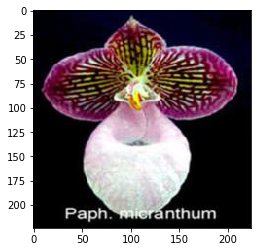

2
./only2classes\test\1\image_06768.jpg


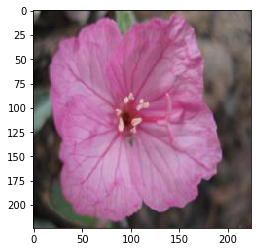

1
./only2classes\test\2\image_05097.jpg


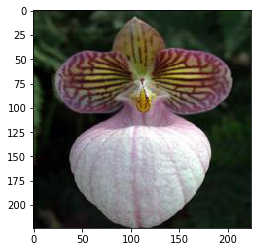

2
./only2classes\test\1\image_06750.jpg


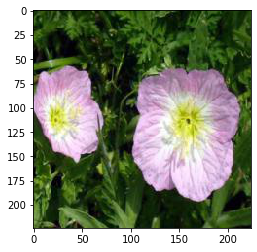

1
./only2classes\test\1\image_06750.jpg


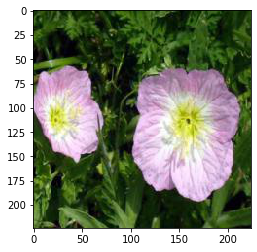

1
./only2classes\test\2\image_05146.jpg


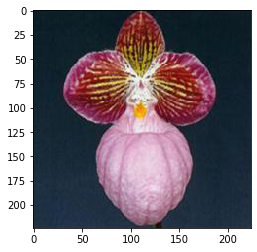

2
./only2classes\test\1\image_06765.jpg


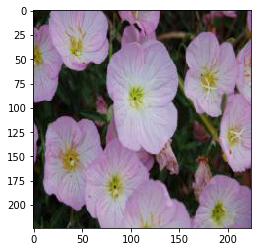

1
./only2classes\test\2\image_05108.jpg


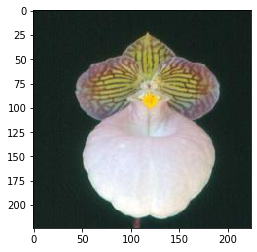

2
./only2classes\test\1\image_06750.jpg


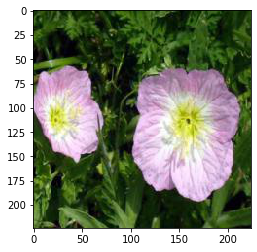

1
./only2classes\test\1\image_06765.jpg


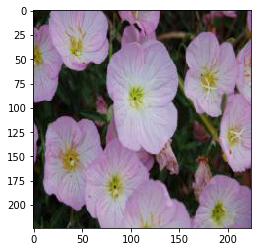

1
./only2classes\test\2\image_05091.jpg


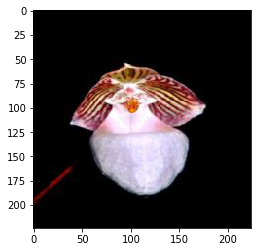

2
./only2classes\test\2\image_05145.jpg


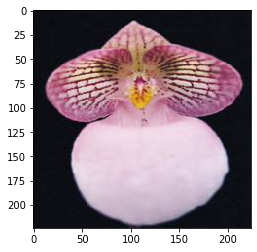

2
./only2classes\test\2\image_05124.jpg


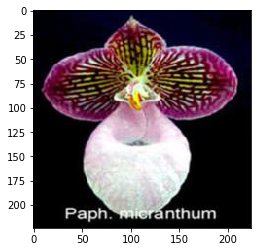

2
./only2classes\test\2\image_05115.jpg


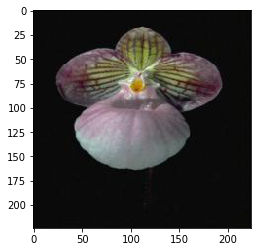

2
./only2classes\test\2\image_05137.jpg


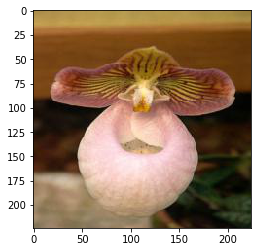

2
./only2classes\test\1\image_06741.jpg


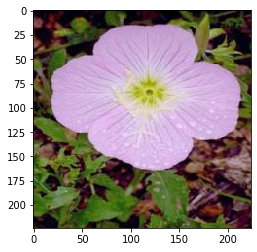

1
./only2classes\test\2\image_05106.jpg


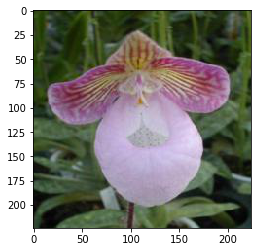

2
./only2classes\test\2\image_05137.jpg


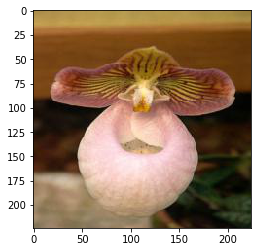

2
./only2classes\test\1\image_06755.jpg


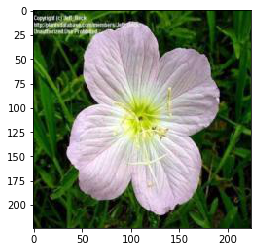

1
./only2classes\test\2\image_05106.jpg


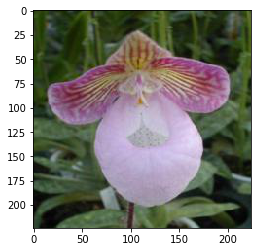

2


In [69]:
# Visualize predictions
visualize_predictions(model, 20)

## Global average pooling

In this case, we don't need to preprocess the data. We will just use the features extracted from the convolutional base to feed the classifier.

The difference between this case and the previous one is that, instead of adding a stack of fully-connected layers, we will add a global average pooling layer and fed its output into a sigmoid activated layer.

##  Define model

In [70]:

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

epochs = 20

model2 = models.Sequential()
model2.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512)))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile model
model2.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [73]:
# Train model
history = model2.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(valid_features, valid_labels))

Train on 1680 samples, validate on 560 samples
Epoch 1/20
1680/1680 [==============================] - 1s 679us/sample - loss: 0.6078 - acc: 0.6339 - val_loss: 0.6277 - val_acc: 0.5018
Epoch 2/20
1680/1680 [==============================] - 1s 400us/sample - loss: 0.4772 - acc: 0.7357 - val_loss: 0.5329 - val_acc: 0.5875
Epoch 3/20
1680/1680 [==============================] - 1s 391us/sample - loss: 0.3940 - acc: 0.8560 - val_loss: 0.4348 - val_acc: 0.8321
Epoch 4/20
1680/1680 [==============================] - 1s 391us/sample - loss: 0.3350 - acc: 0.9238 - val_loss: 0.3817 - val_acc: 0.8750
Epoch 5/20
1680/1680 [==============================] - 1s 409us/sample - loss: 0.2906 - acc: 0.9417 - val_loss: 0.3353 - val_acc: 0.9393
Epoch 6/20
1680/1680 [==============================] - 1s 388us/sample - loss: 0.2566 - acc: 0.9464 - val_loss: 0.3108 - val_acc: 0.9464
Epoch 7/20
1680/1680 [==============================] - 1s 437us/sample - loss: 0.2292 - acc: 0.9554 - val_loss: 0.2776 - val

In [74]:
# Save model
model2.save('prediction_2classes_gap.h5')

## Model evaluation

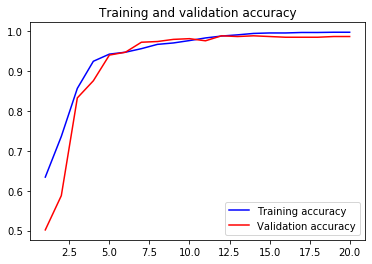

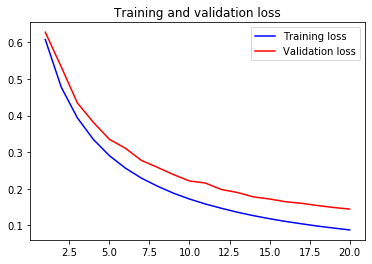

In [75]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

./only2classes\test\2\image_05091.jpg


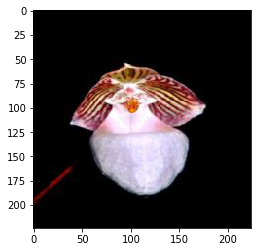

2
./only2classes\test\2\image_05115.jpg


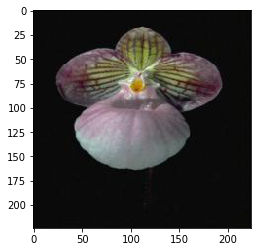

2
./only2classes\test\2\image_05146.jpg


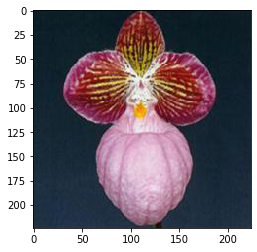

2
./only2classes\test\2\image_05137.jpg


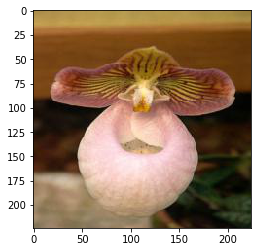

2
./only2classes\test\2\image_05097.jpg


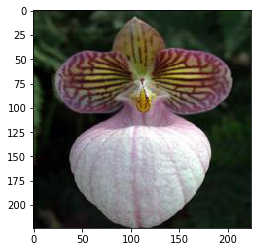

2
./only2classes\test\2\image_05137.jpg


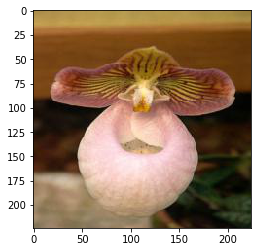

2
./only2classes\test\2\image_05146.jpg


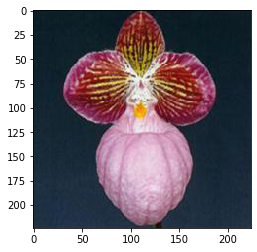

2
./only2classes\test\2\image_05106.jpg


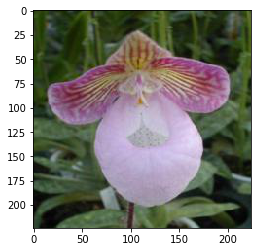

2
./only2classes\test\1\image_06741.jpg


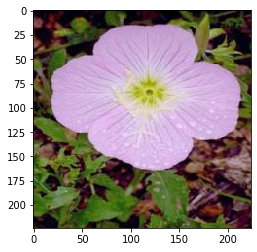

1
./only2classes\test\2\image_05106.jpg


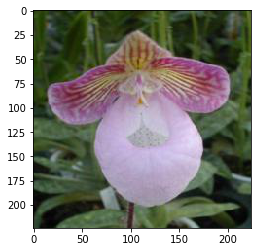

2
./only2classes\test\1\image_06744.jpg


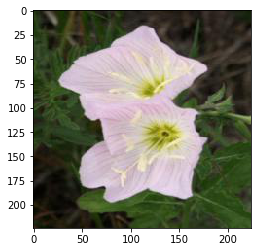

1
./only2classes\test\1\image_06744.jpg


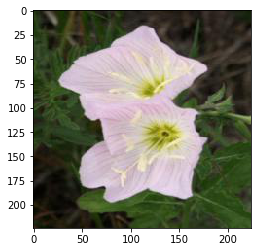

1
./only2classes\test\1\image_06736.jpg


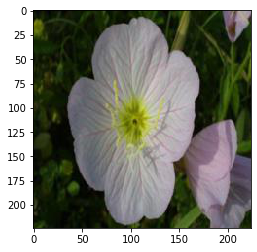

1
./only2classes\test\1\image_06766.jpg


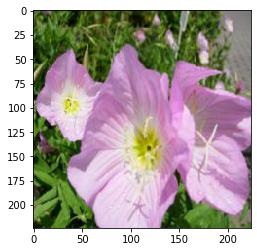

1
./only2classes\test\2\image_05145.jpg


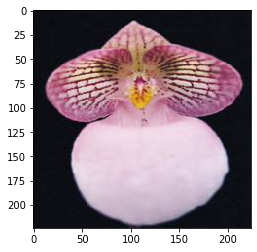

2
./only2classes\test\2\image_05124.jpg


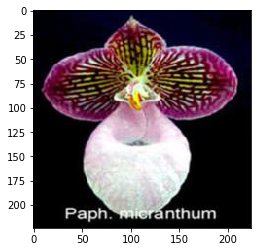

2
./only2classes\test\1\image_06755.jpg


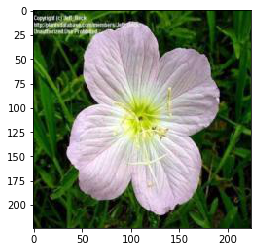

1
./only2classes\test\2\image_05145.jpg


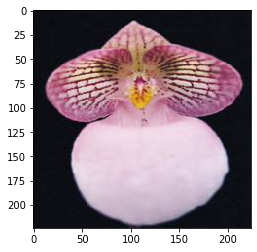

2
./only2classes\test\2\image_05106.jpg


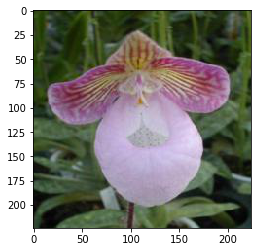

2
./only2classes\test\1\image_06741.jpg


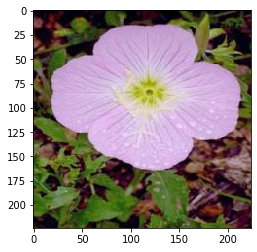

1


In [76]:
# Visualize predictions
visualize_predictions(model, 20)

## **Comments**
### * Validation accuracy is similar to the one resulting from the fully-connected layers solution.
### * The model converges in the second model more smoothly than the previous one.

# 4. Make only classification based on pretrained model

### import libraries and models

In [2]:
import keras
from keras import backend as K
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam,SGD

## Define our VGG16 Model

In [4]:
from keras import models

base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

In [57]:
model_VGG = models.Sequential()
model_VGG.add(Flatten(input_shape=(7,7,512)))
model_VGG.add(Dense(512,activation='relu'))
model_VGG.add(Dropout(0.5))
model_VGG.add(Dense(512,activation='relu'))
model_VGG.add(Dropout(0.5))
model_VGG.add(Dense(256,activation='relu'))
model_VGG.add(Dense(17,activation='softmax'))
model_VGG.summary()
# x=base_model.output
# x=GlobalAveragePooling2D()(x)
# x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
# x=Dropout(0.5)(x)
# x=Dense(1024,activation='relu')(x) #dense layer 2
# preds=Dense(17,activation='softmax')(x) #final layer with softmax activation and 17 classes
# model=Model(inputs=base_model.input,outputs=preds)
# model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 17)               

## Display trainable and non trainable layers

In [6]:
for layer in base_model.layers:
    layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

Layer Type    Layer Name  \
0   <keras.engine.input_layer.InputLayer object at...       input_1   
1   <keras.layers.convolutional.Conv2D object at 0...  block1_conv1   
2   <keras.layers.convolutional.Conv2D object at 0...  block1_conv2   
3   <keras.layers.pooling.MaxPooling2D object at 0...   block1_pool   
4   <keras.layers.convolutional.Conv2D object at 0...  block2_conv1   
5   <keras.layers.convolutional.Conv2D object at 0...  block2_conv2   
6   <keras.layers.pooling.MaxPooling2D object at 0...   block2_pool   
7   <keras.layers.convolutional.Conv2D object at 0...  block3_conv1   
8   <keras.layers.convolutional.Conv2D object at 0...  block3_conv2   
9   <keras.layers.convolutional.Conv2D object at 0...  block3_conv3   
10  <keras.layers.pooling.MaxPooling2D object at 0...   block3_pool   
11  <keras.layers.convolutional.Conv2D object at 0...  block4_conv1   
12  <keras.layers.convolutional.Conv2D object at 0...  block4_conv2   
13  <keras.layers.convolutional.Conv2D object at 0...  block4_conv3   
14  <keras.layers.pooling.MaxPooling2D object at 0...   block4_pool   
15  <keras.layers.convolutional.Conv2D object at 0...  block5_conv1   
16  <keras.layers.convolutional.Conv2D object at 0...  block5_conv2   
17  <keras.layers.convolutional.Conv2D object at 0...  block5_conv3   
18  <keras.layers.pooling.MaxPooling2D object at 0...   block5_pool   

    Layer Trainable  
0             False  
1             False  
2             False  
3             False  
4             False  
5             False  
6             False  
7             False  
8             False  
9             False  
10            False  
11            False  
12            False  
13            False  
14            False  
15            False  
16            False  
17            False  
18            False

In [7]:
layers = [(layer, layer.name, layer.trainable) for layer in model_VGG.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  \
0  <keras.layers.pooling.GlobalAveragePooling2D o...   
1  <keras.layers.core.Dense object at 0x0000019C8...   
2  <keras.layers.core.Dropout object at 0x0000019...   
3  <keras.layers.core.Dense object at 0x0000019CC...   
4  <keras.layers.core.Dropout object at 0x0000019...   
5  <keras.layers.core.Dense object at 0x0000019CC...   
6  <keras.layers.core.Dense object at 0x0000019CC...   

                   Layer Name  Layer Trainable  
0  global_average_pooling2d_1             True  
1                     dense_1             True  
2                   dropout_1             True  
3                     dense_2             True  
4                   dropout_2             True  
5                     dense_3             True  
6                     dense_4             True

## Extract features

### count number of images in each part

In [7]:
import os

sum_valid=sum_train=sum_test=0
for k in range (1,18):
    train_folder_path = './train/{}'.format (k)
    valid_folder_path = './valid/{}'.format (k)
    test_folder_path = './test/{}'.format (k)
    dirListing = os.listdir(train_folder_path)
    sum_train+=len(dirListing)
    dirListing = os.listdir(valid_folder_path)
    sum_valid+=len(dirListing)
    dirListing = os.listdir(test_folder_path)
    sum_test+=len(dirListing)

print("number of training images",sum_train)
print("number of validation images",sum_valid)
print("number of test images",sum_test)
    

number of training images 17583
number of validation images 4760
number of test images 170


In [8]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
train_size, validation_size, test_size = sum_train,sum_valid,sum_test
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 64

img_width,img_height=224,224

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,17))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [9]:
images_train='train'
images_valid='valid'
images_test='test'

In [10]:
train_features, train_labels = extract_features(images_train, train_size)  # Agree with our dataset size
validation_features, validation_labels = extract_features(images_valid, validation_size)
test_features, test_labels = extract_features(images_test, test_size)

Found 17583 images belonging to 17 classes.
Found 4760 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


In [58]:
# Compile model
model_VGG.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [59]:
# Train model
epochs=30
history_VGG = model_VGG.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Train on 17583 samples, validate on 4760 samples
Epoch 1/30
17583/17583 [==============================] - 11s 630us/step - loss: 1.1563 - acc: 0.6398 - val_loss: 0.5215 - val_acc: 0.8223
Epoch 2/30
17583/17583 [==============================] - 11s 623us/step - loss: 0.5106 - acc: 0.8271 - val_loss: 0.4094 - val_acc: 0.8779
Epoch 3/30
17583/17583 [==============================] - 11s 620us/step - loss: 0.3806 - acc: 0.8698 - val_loss: 0.4041 - val_acc: 0.8763
Epoch 4/30
17583/17583 [==============================] - 11s 614us/step - loss: 0.3064 - acc: 0.8954 - val_loss: 0.3338 - val_acc: 0.8874
Epoch 5/30
17583/17583 [==============================] - 11s 615us/step - loss: 0.2400 - acc: 0.9176 - val_loss: 0.3546 - val_acc: 0.8983
Epoch 6/30
17583/17583 [==============================] - 11s 614us/step - loss: 0.2356 - acc: 0.9203 - val_loss: 0.3946 - val_acc: 0.8849
Epoch 7/30
17583/17583 [==============================] - 11s 615us/step - loss: 0.1965 - acc: 0.9351 - val_loss: 0.3

### Save the model

In [89]:
model_VGG.save('VGG.h5')

## Display the history of training and validation accuracies and losses

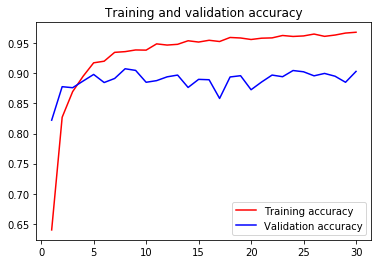

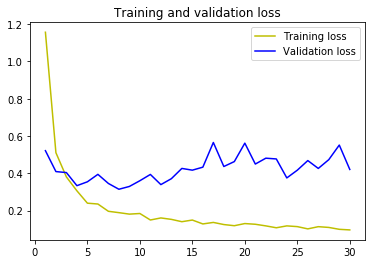

In [60]:
# Plot results
import matplotlib.pyplot as plt

acc = history_VGG.history['acc']
val_acc = history_VGG.history['val_acc']
loss = history_VGG.history['loss']
val_loss = history_VGG.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Comments**
### In this part, we take all layers of the VGG model except the fully connected part
### We freeze theses layers
### We add fully connected layers for classification (17 classes)
### The accuracy of the model exceeds 95% which means that the model is trained very well
### The accuracy of the validation is approximately 90% which means that our model didn't suffer from overfitting
### Both training and validation accuracies and losses converge together 


# 5. Fine tuning of the pretrained model with freezing some layers

### preprocessing the inputs 

In [10]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./train/', # this is the path to the train data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=8,
                                                 class_mode='categorical',
                                                 shuffle=True)

valid_generator=train_datagen.flow_from_directory('./valid/', # this is the path to the valid data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=8,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=train_datagen.flow_from_directory('./test/', # this is the path to the test data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=8,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 17583 images belonging to 17 classes.
Found 4760 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


## Define the InceptionV3 model first version

In [6]:
base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(224, 224, 3)) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.3)(x)
x=Dense(256,activation='relu')(x) #dense layer 2
x=Dropout(0.1)(x)
preds=Dense(17,activation='softmax')(x) #final layer with softmax activation
model_Inception=Model(inputs=base_model.input,outputs=preds)

Instructions for updating:
Colocations handled automatically by placer.


### Define and display trainable and non trainable layers

In [7]:
for layer in model_Inception.layers[:120]:
    layer.trainable = False
for layer in model_Inception.layers[120:]:
    layer.trainable = True
print(model_Inception.layers[120].name)
layers = [(layer, layer.name, layer.trainable) for layer in model_Inception.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

conv2d_31


Layer Type  \
0    <keras.engine.input_layer.InputLayer object at...   
1    <keras.layers.convolutional.Conv2D object at 0...   
2    <keras.layers.normalization.BatchNormalization...   
3    <keras.layers.core.Activation object at 0x0000...   
4    <keras.layers.convolutional.Conv2D object at 0...   
5    <keras.layers.normalization.BatchNormalization...   
6    <keras.layers.core.Activation object at 0x0000...   
7    <keras.layers.convolutional.Conv2D object at 0...   
8    <keras.layers.normalization.BatchNormalization...   
9    <keras.layers.core.Activation object at 0x0000...   
10   <keras.layers.pooling.MaxPooling2D object at 0...   
11   <keras.layers.convolutional.Conv2D object at 0...   
12   <keras.layers.normalization.BatchNormalization...   
13   <keras.layers.core.Activation object at 0x0000...   
14   <keras.layers.convolutional.Conv2D object at 0...   
15   <keras.layers.normalization.BatchNormalization...   
16   <keras.layers.core.Activation object at 0x0000...   
17   <keras.layers.pooling.MaxPooling2D object at 0...   
18   <keras.layers.convolutional.Conv2D object at 0...   
19   <keras.layers.normalization.BatchNormalization...   
20   <keras.layers.core.Activation object at 0x0000...   
21   <keras.layers.convolutional.Conv2D object at 0...   
22   <keras.layers.convolutional.Conv2D object at 0...   
23   <keras.layers.normalization.BatchNormalization...   
24   <keras.layers.normalization.BatchNormalization...   
25   <keras.layers.core.Activation object at 0x0000...   
26   <keras.layers.core.Activation object at 0x0000...   
27   <keras.layers.pooling.AveragePooling2D object ...   
28   <keras.layers.convolutional.Conv2D object at 0...   
29   <keras.layers.convolutional.Conv2D object at 0...   
..                                                 ...   
287  <keras.layers.core.Activation object at 0x0000...   
288  <keras.layers.core.Activation object at 0x0000...   
289  <keras.layers.convolutional.Conv2D object at 0...   
290  <keras.layers.convolutional.Conv2D object at 0...   
291  <keras.layers.convolutional.Conv2D object at 0...   
292  <keras.layers.convolutional.Conv2D object at 0...   
293  <keras.layers.pooling.AveragePooling2D object ...   
294  <keras.layers.convolutional.Conv2D object at 0...   
295  <keras.layers.normalization.BatchNormalization...   
296  <keras.layers.normalization.BatchNormalization...   
297  <keras.layers.normalization.BatchNormalization...   
298  <keras.layers.normalization.BatchNormalization...   
299  <keras.layers.convolutional.Conv2D object at 0...   
300  <keras.layers.normalization.BatchNormalization...   
301  <keras.layers.core.Activation object at 0x0000...   
302  <keras.layers.core.Activation object at 0x0000...   
303  <keras.layers.core.Activation object at 0x0000...   
304  <keras.layers.core.Activation object at 0x0000...   
305  <keras.layers.normalization.BatchNormalization...   
306  <keras.layers.core.Activation object at 0x0000...   
307  <keras.layers.merge.Concatenate object at 0x00...   
308  <keras.layers.merge.Concatenate object at 0x00...   
309  <keras.layers.core.Activation object at 0x0000...   
310  <keras.layers.merge.Concatenate object at 0x00...   
311  <keras.layers.pooling.GlobalAveragePooling2D o...   
312  <keras.layers.core.Dense object at 0x000002584...   
313  <keras.layers.core.Dropout object at 0x0000025...   
314  <keras.layers.core.Dense object at 0x000002591...   
315  <keras.layers.core.Dropout object at 0x0000025...   
316  <keras.layers.core.Dense object at 0x000002591...   

                     Layer Name  Layer Trainable  
0                       input_1            False  
1                      conv2d_1            False  
2         batch_normalization_1            False  
3                  activation_1            False  
4                      conv2d_2            False  
5         batch_normalization_2            False  
6                  activation_2            False  
7                      conv2d_3        

In [12]:
model_Inception.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
history_Inception=model_Inception.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=valid_generator,
                   epochs=5)

Epoch 1/5
2197/2197 [==============================] - 387s 176ms/step - loss: 0.1473 - accuracy: 0.9688 - val_loss: 0.0198 - val_accuracy: 0.9128
Epoch 2/5
2197/2197 [==============================] - 379s 173ms/step - loss: 0.1119 - accuracy: 0.9764 - val_loss: 3.2640 - val_accuracy: 0.8307
Epoch 3/5
2197/2197 [==============================] - 378s 172ms/step - loss: 0.0790 - accuracy: 0.9838 - val_loss: 1.3056e-04 - val_accuracy: 0.9332
Epoch 4/5
2197/2197 [==============================] - 378s 172ms/step - loss: 0.0719 - accuracy: 0.9841 - val_loss: 0.4240 - val_accuracy: 0.9174
Epoch 5/5
2197/2197 [==============================] - 379s 172ms/step - loss: 0.0633 - accuracy: 0.9867 - val_loss: 4.3728e-05 - val_accuracy: 0.9479


### Save the model

In [13]:
model_Inception.save('Inception_v1.h5')

### Display the history of training and validation accuracies and losses

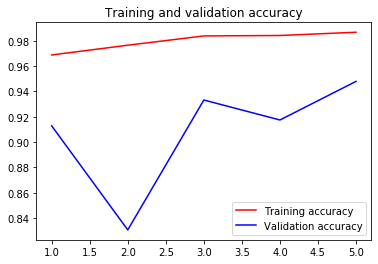

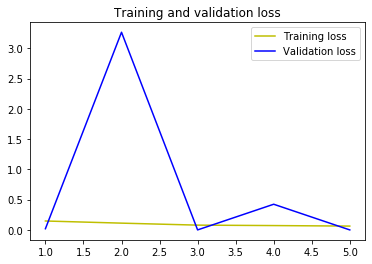

In [15]:
# Plot results
import matplotlib.pyplot as plt

acc = history_Inception.history['accuracy']
val_acc = history_Inception.history['val_accuracy']
loss = history_Inception.history['loss']
val_loss = history_Inception.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Define function to visualize predictions

In [72]:
from keras.preprocessing import image
import numpy
import random
def visualize_predictions(model, n_cases):
    for i in range(0,n_cases):
        path = random.choice(os.listdir(images_test))

        # Get picture
        random_img = random.choice(os.listdir('./test/'+str(path)))
        img_path = os.path.join('./test',path, random_img)
        print(img_path)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        prediction = model.predict(img_tensor.reshape(1,img_width, img_height, 3))
        # Show picture
        plt.imshow(img_tensor)
        plt.show()
        print(prediction)
        # Write prediction
        print(prediction.argmax(axis=-1))

### Visualize the predictions

### first line is the path where it indicated the class
### second line is the predicted class

In [ ]:
# Visualize predictions
visualize_predictions(model_Inception, 20)

## **Comments**

### In the first version :
   #### * In the first version we are freezing only 120 layers so we are making our model more adapted to our database
   #### * It will take more time to train but it will gives better results for accuracies (accuracy increased) andnlosses (losses decreased)
   #### * The training accuracy exceedes 98%
   #### * The validation accuracy reaches approximately 95 % in only 5 epochs 
   #### * Both training accuracies and losses graphes converges and we didn't suffer from overfitting 

## Define the InceptionV3 model second version

In [21]:
base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.5)(x)
x=Dense(256,activation='relu')(x) #dense layer 2
x=Dropout(0.1)(x)
preds=Dense(17,activation='softmax')(x) #final layer with softmax activation
model_Inception2=Model(inputs=base_model.input,outputs=preds)

In [22]:
for layer in model_Inception2.layers[:172]:
    layer.trainable = False
for layer in model_Inception2.layers[172:]:
    layer.trainable = True
print(model_Inception2.layers[172].name)
layers = [(layer, layer.name, layer.trainable) for layer in model_Inception2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

conv2d_245


Layer Type  \
0    <keras.engine.input_layer.InputLayer object at...   
1    <keras.layers.convolutional.Conv2D object at 0...   
2    <keras.layers.normalization.BatchNormalization...   
3    <keras.layers.core.Activation object at 0x0000...   
4    <keras.layers.convolutional.Conv2D object at 0...   
5    <keras.layers.normalization.BatchNormalization...   
6    <keras.layers.core.Activation object at 0x0000...   
7    <keras.layers.convolutional.Conv2D object at 0...   
8    <keras.layers.normalization.BatchNormalization...   
9    <keras.layers.core.Activation object at 0x0000...   
10   <keras.layers.pooling.MaxPooling2D object at 0...   
11   <keras.layers.convolutional.Conv2D object at 0...   
12   <keras.layers.normalization.BatchNormalization...   
13   <keras.layers.core.Activation object at 0x0000...   
14   <keras.layers.convolutional.Conv2D object at 0...   
15   <keras.layers.normalization.BatchNormalization...   
16   <keras.layers.core.Activation object at 0x0000...   
17   <keras.layers.pooling.MaxPooling2D object at 0...   
18   <keras.layers.convolutional.Conv2D object at 0...   
19   <keras.layers.normalization.BatchNormalization...   
20   <keras.layers.core.Activation object at 0x0000...   
21   <keras.layers.convolutional.Conv2D object at 0...   
22   <keras.layers.convolutional.Conv2D object at 0...   
23   <keras.layers.normalization.BatchNormalization...   
24   <keras.layers.normalization.BatchNormalization...   
25   <keras.layers.core.Activation object at 0x0000...   
26   <keras.layers.core.Activation object at 0x0000...   
27   <keras.layers.pooling.AveragePooling2D object ...   
28   <keras.layers.convolutional.Conv2D object at 0...   
29   <keras.layers.convolutional.Conv2D object at 0...   
..                                                 ...   
287  <keras.layers.core.Activation object at 0x0000...   
288  <keras.layers.core.Activation object at 0x0000...   
289  <keras.layers.convolutional.Conv2D object at 0...   
290  <keras.layers.convolutional.Conv2D object at 0...   
291  <keras.layers.convolutional.Conv2D object at 0...   
292  <keras.layers.convolutional.Conv2D object at 0...   
293  <keras.layers.pooling.AveragePooling2D object ...   
294  <keras.layers.convolutional.Conv2D object at 0...   
295  <keras.layers.normalization.BatchNormalization...   
296  <keras.layers.normalization.BatchNormalization...   
297  <keras.layers.normalization.BatchNormalization...   
298  <keras.layers.normalization.BatchNormalization...   
299  <keras.layers.convolutional.Conv2D object at 0...   
300  <keras.layers.normalization.BatchNormalization...   
301  <keras.layers.core.Activation object at 0x0000...   
302  <keras.layers.core.Activation object at 0x0000...   
303  <keras.layers.core.Activation object at 0x0000...   
304  <keras.layers.core.Activation object at 0x0000...   
305  <keras.layers.normalization.BatchNormalization...   
306  <keras.layers.core.Activation object at 0x0000...   
307  <keras.layers.merge.Concatenate object at 0x00...   
308  <keras.layers.merge.Concatenate object at 0x00...   
309  <keras.layers.core.Activation object at 0x0000...   
310  <keras.layers.merge.Concatenate object at 0x00...   
311  <keras.layers.pooling.GlobalAveragePooling2D o...   
312  <keras.layers.core.Dense object at 0x000002597...   
313  <keras.layers.core.Dropout object at 0x0000025...   
314  <keras.layers.core.Dense object at 0x000002598...   
315  <keras.layers.core.Dropout object at 0x0000025...   
316  <keras.layers.core.Dense object at 0x000002598...   

                     Layer Name  Layer Trainable  
0                       input_3            False  
1                    conv2d_189            False  
2       batch_normalization_189            False  
3                activation_189            False  
4                    conv2d_190            False  
5       batch_normalization_190            False  
6                activation_190            False  
7                    conv2d_191        

In [24]:
model_Inception2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.load_weights("six.h5")
step_size_train=train_generator.n//train_generator.batch_size
history_Inception2=model_Inception2.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=valid_generator,
                   epochs=5)

Epoch 1/5
2197/2197 [==============================] - 349s 159ms/step - loss: 0.4853 - accuracy: 0.8598 - val_loss: 0.6117 - val_accuracy: 0.9214
Epoch 2/5
2197/2197 [==============================] - 339s 155ms/step - loss: 0.1578 - accuracy: 0.9615 - val_loss: 7.5601e-05 - val_accuracy: 0.9324
Epoch 3/5
2197/2197 [==============================] - 339s 154ms/step - loss: 0.1140 - accuracy: 0.9731 - val_loss: 0.7116 - val_accuracy: 0.9147
Epoch 4/5
2197/2197 [==============================] - 339s 155ms/step - loss: 0.0747 - accuracy: 0.9822 - val_loss: 0.9988 - val_accuracy: 0.9546
Epoch 5/5
2197/2197 [==============================] - 340s 155ms/step - loss: 0.0725 - accuracy: 0.9843 - val_loss: 1.1921e-07 - val_accuracy: 0.9565


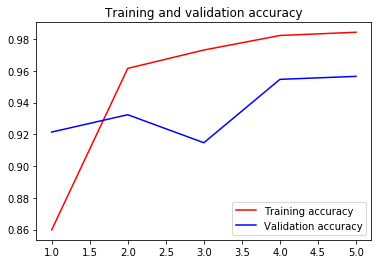

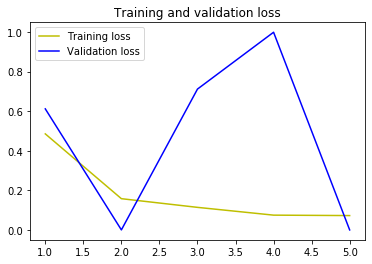

In [26]:
# Plot results
import matplotlib.pyplot as plt

acc = history_Inception2.history['accuracy']
val_acc = history_Inception2.history['val_accuracy']
loss = history_Inception2.history['loss']
val_loss = history_Inception2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
model_Inception2.save('Inception_v2.h5')

### Visualize the predictions

In [ ]:
# Visualize predictions
visualize_predictions(model_Inception2, 20)

## **Comments**

### The difference now is:
   #### * In the second version we are freezing more layers (171 layers are freezed) so we are make also our model  training on our data base
   #### * It will take less time to train than the first one and it  gives good results for accuracies (accuracy incresed) and    losses (losses decreased)
   #### * The training accuracy exceede 98%
   #### * The validation accuracy ecxeeded 95 % in only 5 epochs with less fluctuations
   #### * Both training accuracies and losses graphes converges and we didn't suffer from overfitting 

## Define the Mobilenet model

In [74]:
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input

In [75]:
base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x) #dense layer 2
preds=Dense(17,activation='softmax')(x) #final layer with softmax activation
model_Mobilenet=Model(inputs=base_model.input,outputs=preds)
model_Mobilenet.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

### Define and display trainable and non trainable layers

In [77]:
model_Mobilenet.trainable=True
for layer in model_Mobilenet.layers[:28]:
    layer.trainable=False
for layer in model_Mobilenet.layers[28:]:
    layer.trainable=True

layers = [(layer, layer.name, layer.trainable) for layer in model_Mobilenet.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  \
0   <keras.engine.input_layer.InputLayer object at...   
1   <keras.layers.convolutional.ZeroPadding2D obje...   
2   <keras.layers.convolutional.Conv2D object at 0...   
3   <keras.layers.normalization.BatchNormalization...   
4   <keras.layers.advanced_activations.ReLU object...   
5   <keras.layers.convolutional.DepthwiseConv2D ob...   
6   <keras.layers.normalization.BatchNormalization...   
7   <keras.layers.advanced_activations.ReLU object...   
8   <keras.layers.convolutional.Conv2D object at 0...   
9   <keras.layers.normalization.BatchNormalization...   
10  <keras.layers.advanced_activations.ReLU object...   
11  <keras.layers.convolutional.ZeroPadding2D obje...   
12  <keras.layers.convolutional.DepthwiseConv2D ob...   
13  <keras.layers.normalization.BatchNormalization...   
14  <keras.layers.advanced_activations.ReLU object...   
15  <keras.layers.convolutional.Conv2D object at 0...   
16  <keras.layers.normalization.BatchNormalization...   
17  <keras.layers.advanced_activations.ReLU object...   
18  <keras.layers.convolutional.DepthwiseConv2D ob...   
19  <keras.layers.normalization.BatchNormalization...   
20  <keras.layers.advanced_activations.ReLU object...   
21  <keras.layers.convolutional.Conv2D object at 0...   
22  <keras.layers.normalization.BatchNormalization...   
23  <keras.layers.advanced_activations.ReLU object...   
24  <keras.layers.convolutional.ZeroPadding2D obje...   
25  <keras.layers.convolutional.DepthwiseConv2D ob...   
26  <keras.layers.normalization.BatchNormalization...   
27  <keras.layers.advanced_activations.ReLU object...   
28  <keras.layers.convolutional.Conv2D object at 0...   
29  <keras.layers.normalization.BatchNormalization...   
..                                                ...   
62  <keras.layers.convolutional.DepthwiseConv2D ob...   
63  <keras.layers.normalization.BatchNormalization...   
64  <keras.layers.advanced_activations.ReLU object...   
65  <keras.layers.convolutional.Conv2D object at 0...   
66  <keras.layers.normalization.BatchNormalization...   
67  <keras.layers.advanced_activations.ReLU object...   
68  <keras.layers.convolutional.DepthwiseConv2D ob...   
69  <keras.layers.normalization.BatchNormalization...   
70  <keras.layers.advanced_activations.ReLU object...   
71  <keras.layers.convolutional.Conv2D object at 0...   
72  <keras.layers.normalization.BatchNormalization...   
73  <keras.layers.advanced_activations.ReLU object...   
74  <keras.layers.convolutional.ZeroPadding2D obje...   
75  <keras.layers.convolutional.DepthwiseConv2D ob...   
76  <keras.layers.normalization.BatchNormalization...   
77  <keras.layers.advanced_activations.ReLU object...   
78  <keras.layers.convolutional.Conv2D object at 0...   
79  <keras.layers.normalization.BatchNormalization...   
80  <keras.layers.advanced_activations.ReLU object...   
81  <keras.layers.convolutional.DepthwiseConv2D ob...   
82  <keras.layers.normalization.BatchNormalization...   
83  <keras.layers.advanced_activations.ReLU object...   
84  <keras.layers.convolutional.Conv2D object at 0...   
85  <keras.layers.normalization.BatchNormalization...   
86  <keras.layers.advanced_activations.ReLU object...   
87  <keras.layers.pooling.GlobalAveragePooling2D o...   
88  <keras.layers.core.Dense object at 0x0000025A1...   
89  <keras.layers.core.Dropout object at 0x0000025...   
90  <keras.layers.core.Dense object at 0x0000025A2...   
91  <keras.layers.core.Dense object at 0x0000025A2...   

                    Layer Name  Layer Trainable  
0                      input_8            False  
1                    conv1_pad            False  
2                        conv1            False  
3                     conv1_bn            False  
4                   conv1_relu            False  
5                    conv_dw_1            False  
6                 conv_dw_1_bn            False  
7               conv_dw_1_relu            False  
8                    conv_pw_1            False  
9       

In [78]:
model_Mobilenet.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_size_train=train_generator.n//train_generator.batch_size
history_Mobilenet=model_Mobilenet.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=valid_generator,
                   epochs=5)

Epoch 1/5
2197/2197 [==============================] - 196s 89ms/step - loss: 0.5739 - accuracy: 0.8437 - val_loss: 0.3453 - val_accuracy: 0.7884
Epoch 2/5
2197/2197 [==============================] - 187s 85ms/step - loss: 0.2699 - accuracy: 0.9335 - val_loss: 0.5489 - val_accuracy: 0.8029
Epoch 3/5
2197/2197 [==============================] - 190s 87ms/step - loss: 0.2082 - accuracy: 0.9536 - val_loss: 0.0115 - val_accuracy: 0.8937
Epoch 4/5
2197/2197 [==============================] - 189s 86ms/step - loss: 0.1709 - accuracy: 0.9614 - val_loss: 0.2006 - val_accuracy: 0.9042
Epoch 5/5
2197/2197 [==============================] - 189s 86ms/step - loss: 0.1045 - accuracy: 0.9753 - val_loss: 3.2559e-06 - val_accuracy: 0.9155


### Display the history of training and validation accuracies and losses

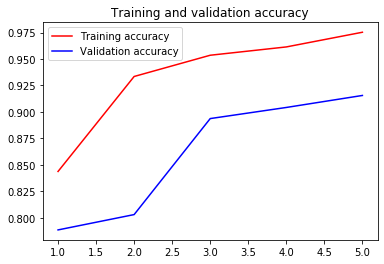

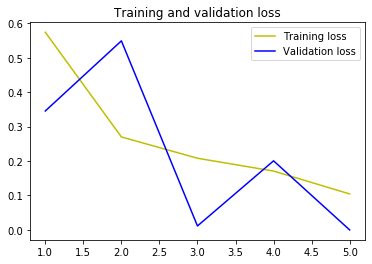

In [79]:
# Plot results
import matplotlib.pyplot as plt

acc = history_Mobilenet.history['accuracy']
val_acc = history_Mobilenet.history['val_accuracy']
loss = history_Mobilenet.history['loss']
val_loss = history_Mobilenet.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Visualize the predictions

In [ ]:
# Visualize predictions
visualize_predictions(model_Mobilenet, 20)

### Save model

In [80]:
model_Mobilenet.save('MobileNet.h5')

## **Comments**

### Now we are using another model which is Mobile net:
   #### * In this model we have less layers (91 without the sully connected layers)
   #### * We are freezing 28 layers and the rest are trainable
   #### * The training accuracy exceeded 96%
   #### * The validation accuracy ecxeeded 90 % 
   #### * Both training accuracies and losses graphes converge and we didn't suffer from overfitting 